In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime
from config import weather_api_key
import time

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

30.446103756159246 -82.20361264930985
-87.20436225202063 112.49241256514637
-62.33502312902499 -36.96533418676347
38.565342487461606 9.044725583904267
-24.70471746175086 -30.49442591815813
35.00315457777593 66.02628424288048
46.997932598733286 29.75734291667675
35.71491076324304 41.2573552650631
14.85313998661968 -61.56932385603834
-88.48148762267294 70.73691438381317
44.732947936732614 -75.0065171339775
72.24765568830233 -10.170381481135564
35.21779031109914 -66.29982079493794
-35.90734035249731 -176.47355052573096
-78.77527413032298 173.44219141030942
16.468847737546426 103.38334068929487
-75.16848616816284 -148.7539792078152
-33.567161782151175 102.56181133579855
60.725121637644804 167.7581051774692
-87.56407867330587 155.82953951927868
-15.407779315814793 128.30298458355122
18.54014534910013 -171.43630660217326
49.907235590187724 -166.39570169187093
62.09672408472545 -113.72828359341968
-6.355902393336336 85.50254529415548
13.521531286920094 2.228268427783405
-43.19458151855701 117

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lake city
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | capoterra
Processing Record 5 of Set 1 | vila velha
Processing Record 6 of Set 1 | ciras
City not found. Skipping...
Processing Record 7 of Set 1 | velykoploske
Processing Record 8 of Set 1 | sinjar
Processing Record 9 of Set 1 | saint-pierre
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | potsdam
Processing Record 12 of Set 1 | hofn
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | yang talat
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | tilichiki
Processing Record 20 of Set 1 | kununurra
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set

Processing Record 37 of Set 4 | tamandare
Processing Record 38 of Set 4 | isoka
Processing Record 39 of Set 4 | kruisfontein
Processing Record 40 of Set 4 | rio gallegos
Processing Record 41 of Set 4 | sudogda
Processing Record 42 of Set 4 | bedesa
Processing Record 43 of Set 4 | vestmannaeyjar
Processing Record 44 of Set 4 | kontagora
Processing Record 45 of Set 4 | portland
Processing Record 46 of Set 4 | lieksa
Processing Record 47 of Set 4 | clyde river
Processing Record 48 of Set 4 | eureka
Processing Record 49 of Set 4 | ormara
Processing Record 50 of Set 4 | algiers
Processing Record 1 of Set 5 | kralendijk
Processing Record 2 of Set 5 | port hedland
Processing Record 3 of Set 5 | atascocita
Processing Record 4 of Set 5 | mujiayingzi
Processing Record 5 of Set 5 | coahuayana
Processing Record 6 of Set 5 | korsakov
Processing Record 7 of Set 5 | vallenar
Processing Record 8 of Set 5 | kirovohrad
Processing Record 9 of Set 5 | kathmandu
Processing Record 10 of Set 5 | naze
Process

Processing Record 26 of Set 8 | aklavik
Processing Record 27 of Set 8 | nara
Processing Record 28 of Set 8 | buchanan
Processing Record 29 of Set 8 | chokurdakh
Processing Record 30 of Set 8 | villa rica
Processing Record 31 of Set 8 | marsh harbour
Processing Record 32 of Set 8 | huarmey
Processing Record 33 of Set 8 | longlac
City not found. Skipping...
Processing Record 34 of Set 8 | maragogi
Processing Record 35 of Set 8 | voi
Processing Record 36 of Set 8 | haines junction
Processing Record 37 of Set 8 | port blair
Processing Record 38 of Set 8 | kismayo
Processing Record 39 of Set 8 | alofi
Processing Record 40 of Set 8 | taranto
Processing Record 41 of Set 8 | matara
Processing Record 42 of Set 8 | orissaare
Processing Record 43 of Set 8 | masumbwe
Processing Record 44 of Set 8 | rawah
Processing Record 45 of Set 8 | pacific grove
Processing Record 46 of Set 8 | manjacaze
Processing Record 47 of Set 8 | christchurch
Processing Record 48 of Set 8 | nizhniy kuranakh
Processing Rec

Processing Record 12 of Set 12 | cayenne
Processing Record 13 of Set 12 | nouadhibou
Processing Record 14 of Set 12 | sao miguel do araguaia
Processing Record 15 of Set 12 | jalingo
Processing Record 16 of Set 12 | nyzhnya duvanka
Processing Record 17 of Set 12 | manzhouli
Processing Record 18 of Set 12 | khani
Processing Record 19 of Set 12 | warqla
City not found. Skipping...
Processing Record 20 of Set 12 | tefe
Processing Record 21 of Set 12 | kavaratti
Processing Record 22 of Set 12 | dharur
Processing Record 23 of Set 12 | farafangana
Processing Record 24 of Set 12 | sistranda
Processing Record 25 of Set 12 | shakhtinsk
Processing Record 26 of Set 12 | pozo colorado
Processing Record 27 of Set 12 | boende
Processing Record 28 of Set 12 | manitouwadge
Processing Record 29 of Set 12 | umm kaddadah
Processing Record 30 of Set 12 | khotyn
Processing Record 31 of Set 12 | chulym
Processing Record 32 of Set 12 | zhigansk
Processing Record 33 of Set 12 | shimanovsk
Processing Record 34 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lake City,30.1897,-82.6393,92.62,55,0,6.91,US,2022-06-07 20:14:54
1,Albany,42.6001,-73.9662,78.64,58,100,5.99,US,2022-06-07 20:11:42
2,Mar Del Plata,-38.0023,-57.5575,62.94,55,0,13.80,AR,2022-06-07 20:14:54
3,Capoterra,39.1763,8.9718,76.55,60,0,12.66,IT,2022-06-07 20:14:55
4,Vila Velha,-20.3297,-40.2925,82.35,54,0,6.91,BR,2022-06-07 20:14:55
5,Velykoploske,47.0125,29.6717,64.85,55,41,1.07,UA,2022-06-07 20:14:55
6,Sinjar,36.3209,41.8754,82.53,28,0,7.90,IQ,2022-06-07 20:14:56
7,Saint-Pierre,-21.3393,55.4781,73.08,64,100,6.91,RE,2022-06-07 20:14:56
8,Potsdam,52.3989,13.0657,69.19,70,21,4.94,DE,2022-06-07 20:10:04
9,Hofn,64.2539,-15.2082,49.93,86,99,8.97,IS,2022-06-07 20:14:57


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lake City,US,2022-06-07 20:14:54,30.1897,-82.6393,92.62,55,0,6.91
1,Albany,US,2022-06-07 20:11:42,42.6001,-73.9662,78.64,58,100,5.99
2,Mar Del Plata,AR,2022-06-07 20:14:54,-38.0023,-57.5575,62.94,55,0,13.80
3,Capoterra,IT,2022-06-07 20:14:55,39.1763,8.9718,76.55,60,0,12.66
4,Vila Velha,BR,2022-06-07 20:14:55,-20.3297,-40.2925,82.35,54,0,6.91
5,Velykoploske,UA,2022-06-07 20:14:55,47.0125,29.6717,64.85,55,41,1.07
6,Sinjar,IQ,2022-06-07 20:14:56,36.3209,41.8754,82.53,28,0,7.90
7,Saint-Pierre,RE,2022-06-07 20:14:56,-21.3393,55.4781,73.08,64,100,6.91
8,Potsdam,DE,2022-06-07 20:10:04,52.3989,13.0657,69.19,70,21,4.94
9,Hofn,IS,2022-06-07 20:14:57,64.2539,-15.2082,49.93,86,99,8.97


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

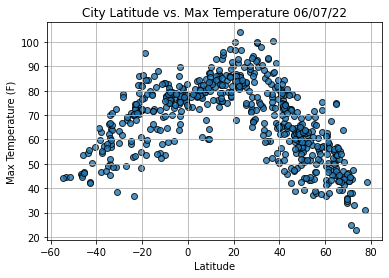

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

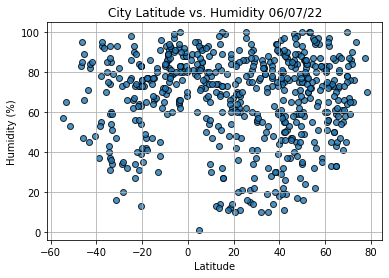

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

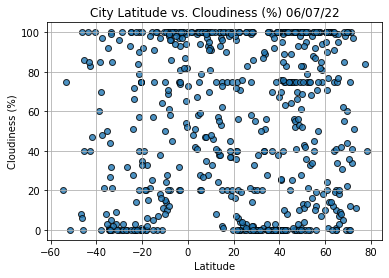

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


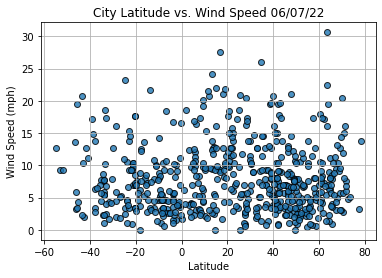

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()